In [1]:
from models import simple_GCN
import torch
from Load_and_Process_Data import LPD
from torch_geometric.loader import DataLoader
from collections import OrderedDict
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import math

/homes/mcolombari/AI_for_Bioinformatics_Project/env/training_env/lib/python3.11/site-packages/torch/__config__.py:9: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._show_config()


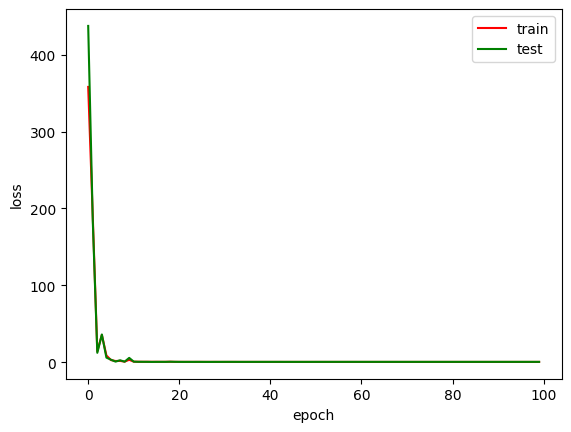

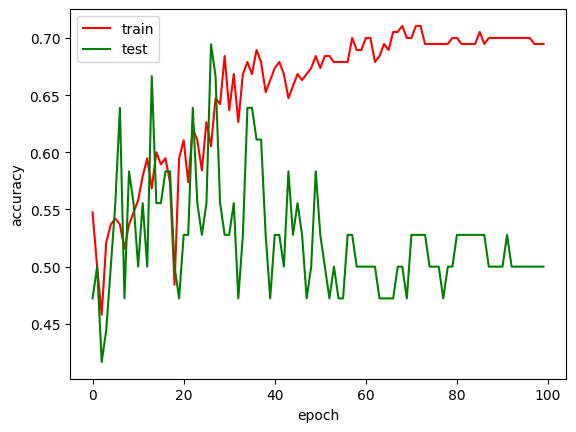

In [2]:
# Graph results

RESULTS_PATH = "/homes/mcolombari/AI_for_Bioinformatics_Project/Training/Train_output/Train_Gene_80/epoch_data.txt"
RANGE = (0,100)
SKIP_LINE = None

train_acc = []
test_acc = []
train_loss = []
test_loss = []
x = []

index = 0
with open(RESULTS_PATH, 'r') as file:
    for line in file:
        index += 1
        if SKIP_LINE and index >= SKIP_LINE:
            break
        x.append(int(line.split("'")[1]))
        train_loss.append(float(line.split("'")[3]))
        train_acc.append(float(line.split("'")[5]))
        test_loss.append(float(line.split("'")[7]))
        test_acc.append(float(line.split("'")[9]))

X = np.array(x[RANGE[0]:RANGE[1]])
y = np.array(train_loss[RANGE[0]:RANGE[1]])
z = np.array(test_loss[RANGE[0]:RANGE[1]])

# Plotting both the curves simultaneously
plt.plot(X, y, color='r', label='train')
plt.plot(X, z, color='g', label='test')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("epoch")
plt.ylabel("loss")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()


y = np.array(train_acc[RANGE[0]:RANGE[1]])
z = np.array(test_acc[RANGE[0]:RANGE[1]])

# Plotting both the curves simultaneously
plt.plot(X, y, color='r', label='train')
plt.plot(X, z, color='g', label='test')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("epoch")
plt.ylabel("accuracy")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()



In [6]:
torch.manual_seed(12345)

In [7]:
CHECKPOINT_PATH = "/homes/mcolombari/AI_for_Bioinformatics_Project/Training/Train_output/Train_Gene_3/model_checkpoints/Train_Gene_epoch_199.pth"
PATH_GTF_FILE = "/homes/mcolombari/AI_for_Bioinformatics_Project/Personal/gencode.v47.annotation.gtf"
PATH_FOLDER_GENE = "/work/h2020deciderficarra_shared/TCGA/OV/project_n16_data/GeneExpression"
PATH_CASE_ID_STRUCTURE = "/homes/mcolombari/AI_for_Bioinformatics_Project/Preprocessing/Final/case_id_and_structure.json"


hyperparameter = {
    'num_classes': 2,
    'epochs': 200,
    'batch_size': 10,
    'seed': 123456,
    'num_workers': 6,
    'lr': 0.01,
    'save_model_period': 10, # How many epoch to wait before save the next model.
    'percentage_of_test': 0.3, # How many percentage of the dataset is used for testing.
    'feature_to_save': ['tpm_unstranded'], # Specifci parameter for gene.
    'feature_to_compare': 'tpm_unstranded'
}


In [9]:
# Model
model = simple_GCN(1, 4, hyperparameter['num_classes'])

# Load Model
checkpoint = torch.load(CHECKPOINT_PATH)
model_dict = checkpoint['model_dict']
model.load_state_dict(model_dict)

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [ ]:
# Load data
lpd = LPD(PATH_GTF_FILE, PATH_FOLDER_GENE, PATH_CASE_ID_STRUCTURE,
          hyperparameter['feature_to_save'], hyperparameter['feature_to_compare'],
          hyperparameter['num_classes'], hyperparameter['percentage_of_test'])

lpd.read_gtf_file()
lpd.preprocessing()
lpd.create_graph()

data_list = lpd.list_of_Data